# Universal Bank

### Understanding the problem with a business perspective
Universal bank is a small but growing bank. The majority of customers are liability, or deposit only, customers, and the bank is interested in converting more of them into asset, or borrowing, customers. The bank has had past success with marketing compaigns to convert the liability customers to personal loan customers. With that success, the bank is interested in being more targeted with its efforts to ensure marketing dollars are spent on those most likely to convert. 
__*The bank would like a model to help it predict which new customers are likely to become personal loan customers to aid in this targeting.*__

> Personal loan.
    * Intrested customer base.
    * Data based on previous campaign.
    * Bank has 5000 customers.



### Technical Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans which means we have to build a model which will be used to predict which customer will be most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset. __I will solve this problem with K-Nearest Neighbors(KNN).__

 > Data attributes
 - (age, income, mortgage, securities account, Personal Loan response previously)

In [170]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [171]:
dataset = pd.read_csv('UniversalBank.csv')     #importing the dataset

In [172]:
# Shape of the dataframe is (5000, 14). There are 5000 rows and 14 columns in the dataset.
rows_count, columns_count = dataset.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


In [173]:
dataset.head(5) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

In [174]:
#Data type of each attribute
dataset.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Categorical data attributes are displaying int data type, because they have values stored in binary form. Where __0 means NO__ and __1 means YES__

In [175]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


__Observation:__
Minumum value of Experience column is -3.0 which are errorneous values because Experience should never be negative, so we will have to clean it.



## Data cleaning

In [176]:
#Checking the presence of missing values
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Here total missing values count from each column is 0 and we can see there is any missing value in the imported dataset.

We have got no missing values; hence there will be no need to imputing any of them.

In [177]:
#dummifying the education attibute
d1 = pd.get_dummies(dataset["Education"])
d1.columns = ['Education_1','Education_2','Education_3']
temp_dataset=pd.concat([dataset, d1], axis=1)
dataset = temp_dataset.drop("Education", axis=1)

dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [178]:
#We can't simply count all the error values by printing 5000 values in the Experience column
# Checking the total number of negative values in Experience.
print(dataset[dataset['Experience'] < 0]['Experience'].value_counts())

# Total records of negative experience
dataset[dataset['Experience'] < 0]['Experience'].count()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64


52

There are 52 records with negative values of Experience in the dataset.

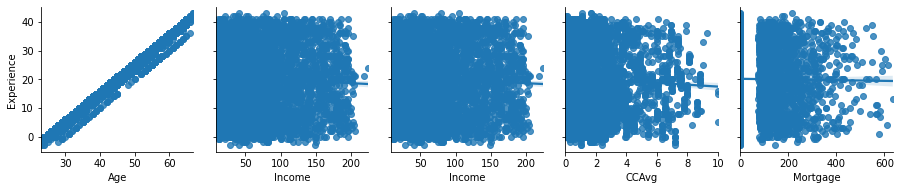

In [179]:
#Checking the association of Experience with other quantitive variables 
quantitiveVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expAssGrid = sns.PairGrid(dataset, y_vars = 'Experience', x_vars = quantitiveVar)
expAssGrid.map(sns.regplot)

Replace each negative 'Experience' value with 0.

In [180]:
dataset[dataset['Experience'] < 0] =0


In [181]:
# Total records of negative experience -- checking again for validation of data cleaning step
print(dataset[dataset['Experience'] < 0]['Experience'].count())
print("\nExperience.describe()")
dataset.Experience.describe()

0

Experience.describe()


count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Now we can see the min is 0.0 which was -3.0 before error fixing.

## Exploratory Data Analysis using plots

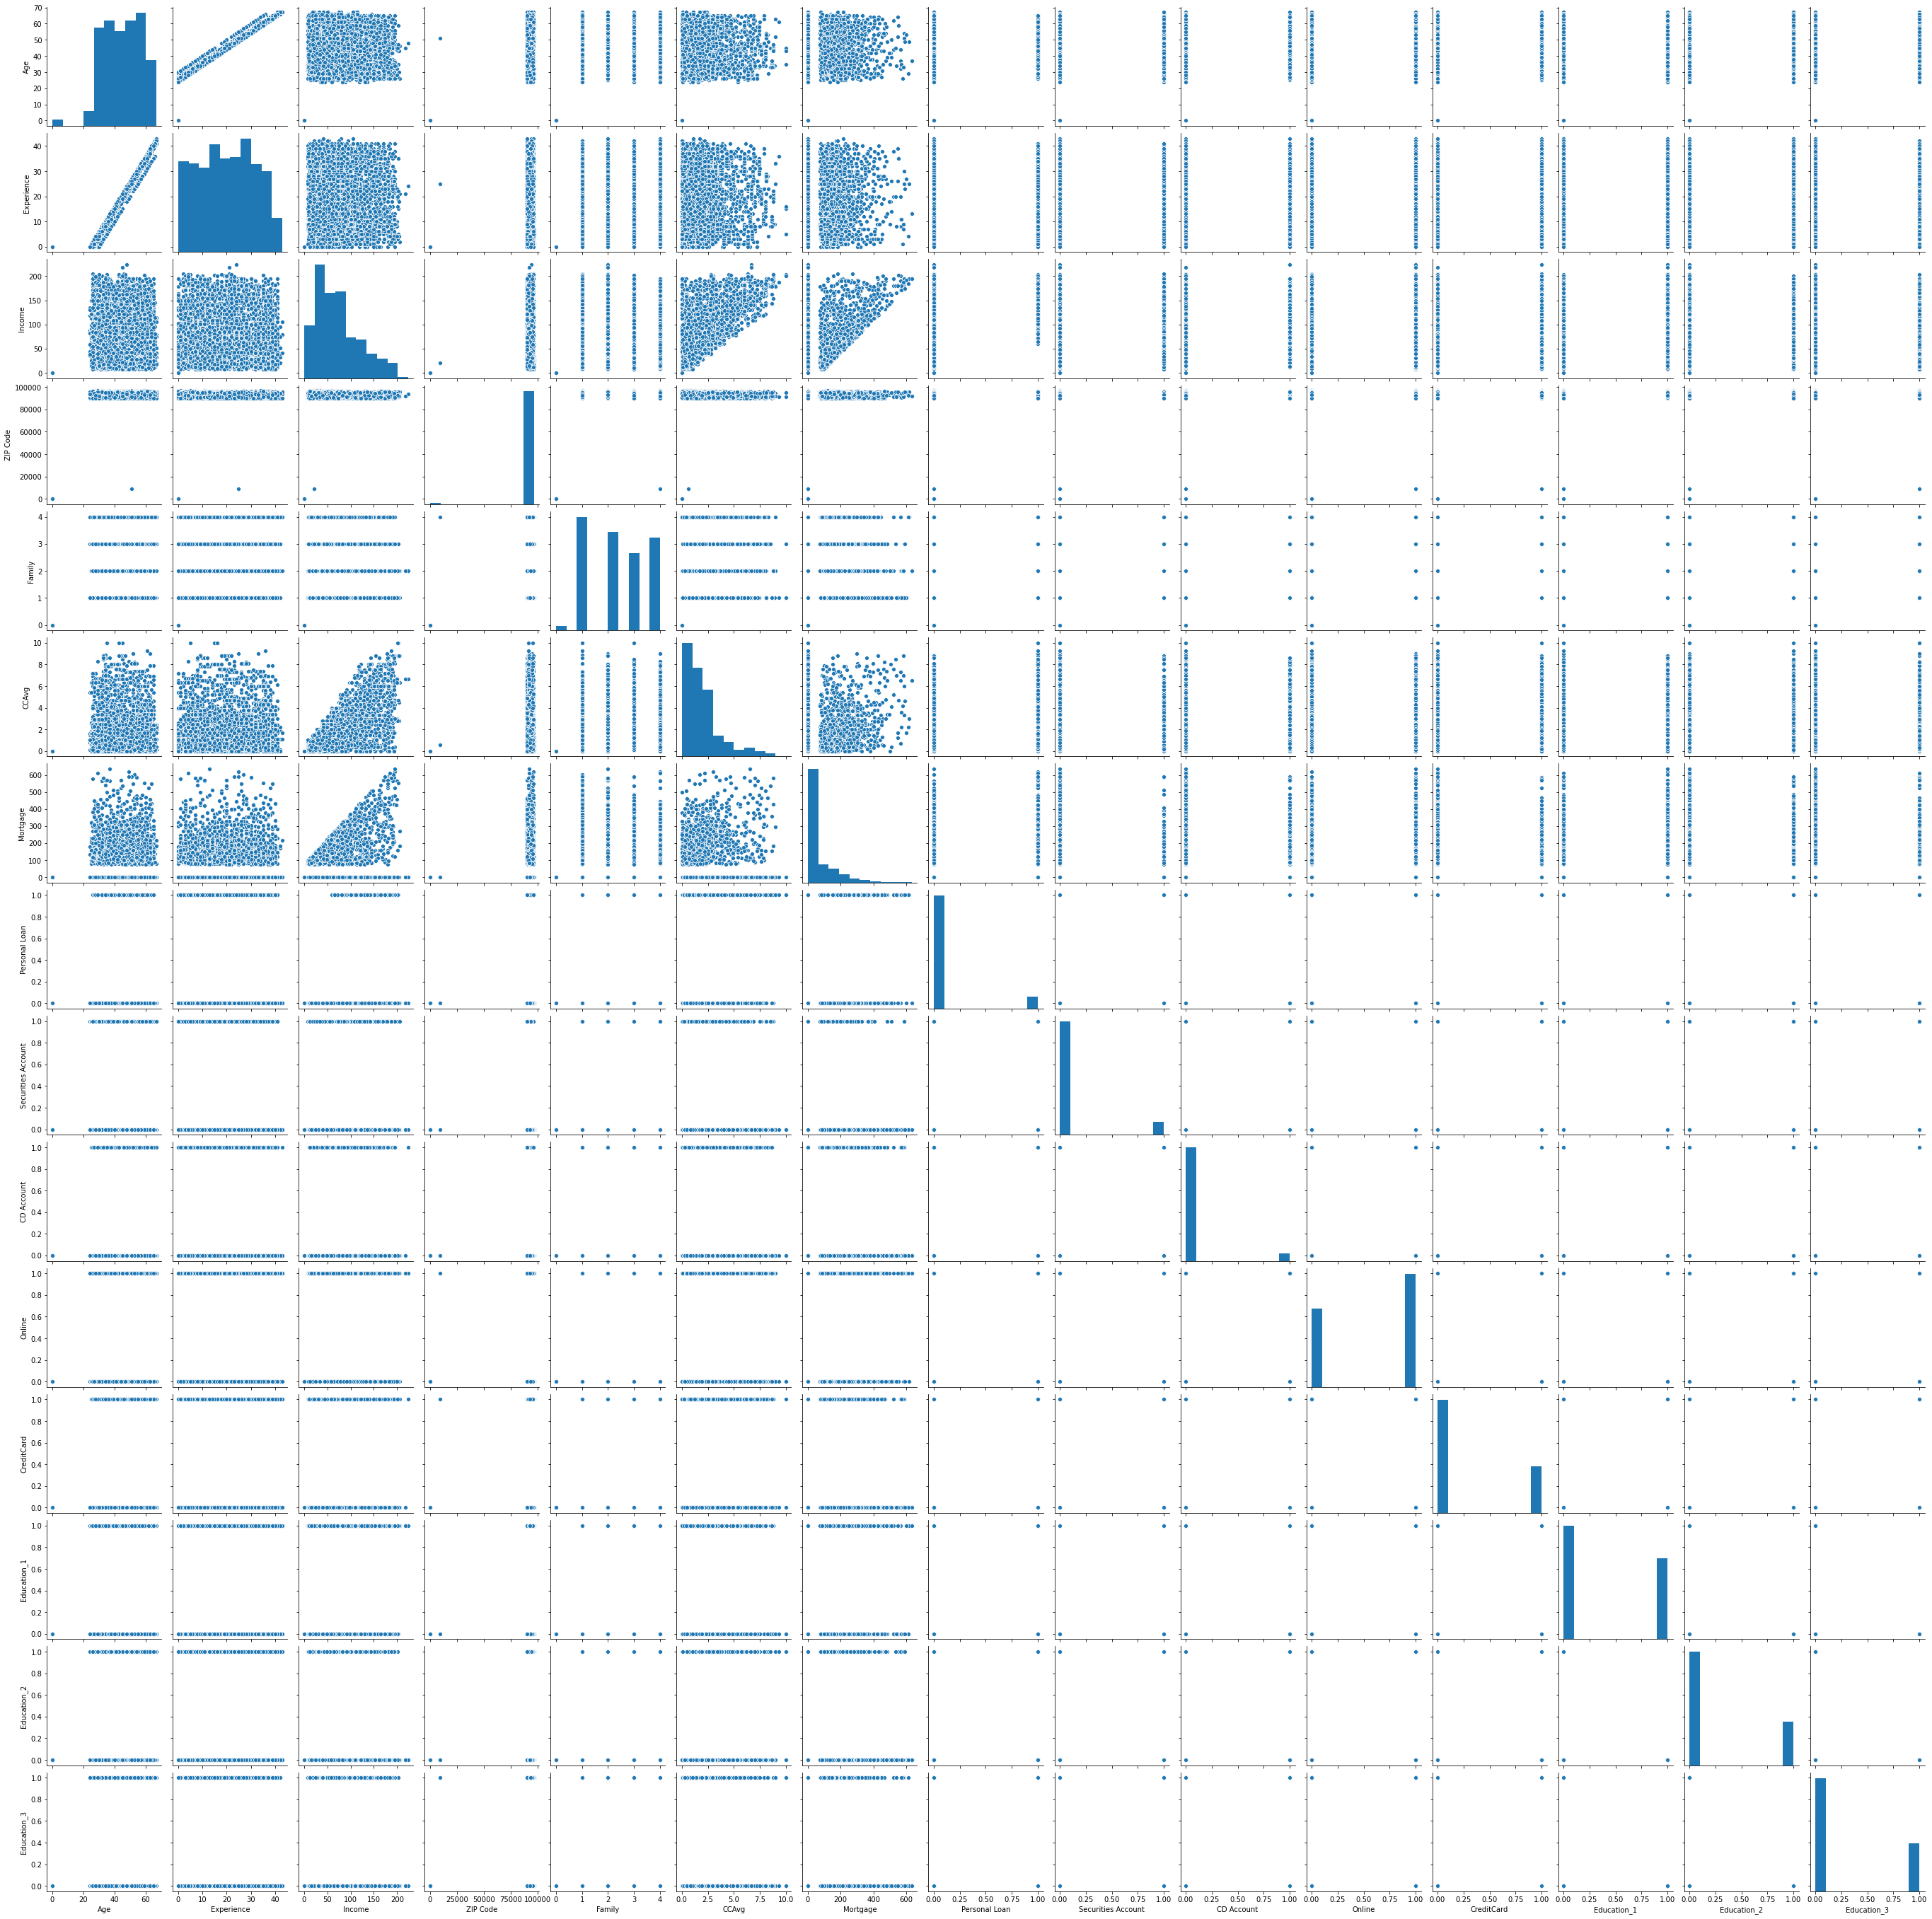

In [182]:
sns.pairplot(dataset.iloc[:,1:])

__Observation:__ 

- 'Age' column is almost uniformly distributed. The mean and median is almost same. *Most of the customers age is between 25 to 65 years.*
- 'Experience' is also almost uniformly distributed. The mean is equal to median. *'Experience' and 'Age' are stong positive associasion.*
- 'Income' is positively skewed and it has 2 outliers
- We dont see any relationship with the ZIP Code and other variables.
- Family and Education has low association with the 'Personal Loan'.
- The disribution of CCAvg is also a positively skewed variable. *Majority of the customers average monthly spending is between 1k to 9k.*
- 'Mortgage' is also positively skewed. *Majority of the individuals have a mortgage of less than 40K.*

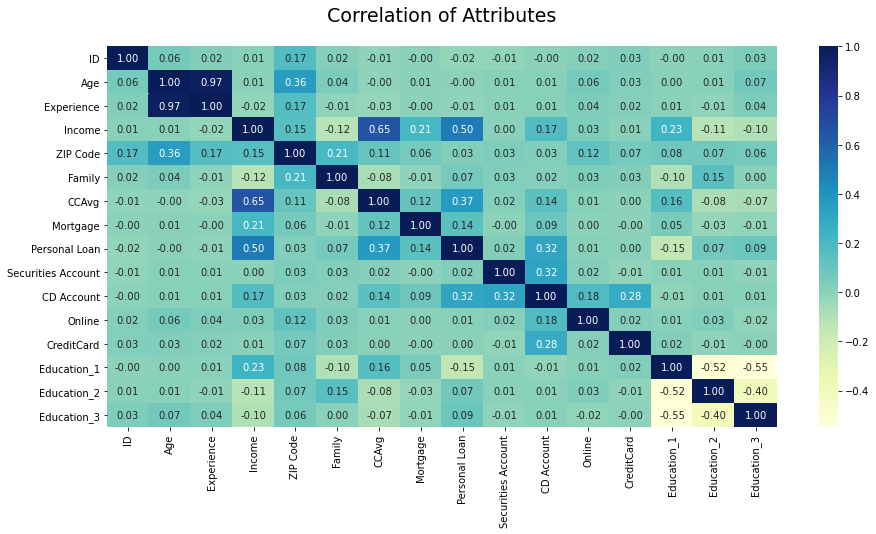

In [183]:
#Corelation using a heatmap with the seaborn package library
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(dataset.corr(), cmap='YlGnBu',annot=True, fmt='.2f')

__Observation:__ From the above heatmap:

- Age and Experience are highly correlated and the correlation is almost 1.
- 'Income' and 'CCAvg' is moderately correlated.
- Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
- We can see in above heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
- 'Mortgage' has moderate correlation with 'Income' which is about 12%.
- 'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

# Building the model

- As we have seen above 'ID' and 'ZIP Code' are not relevent for our model building so we will drop it.

In [184]:
dataset = dataset.drop(['ID','ZIP Code'], axis=1)

In [185]:
dataset.head(5)

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [186]:
dataset

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,0,0,0,1,0,0,0,1
4996,30,4,15,4,0.4,85,0,0,0,1,0,1,0,0
4997,63,39,24,2,0.3,0,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,0,0,0,0,1,0,0,1,0


In [187]:
X = dataset.drop('Personal Loan', axis=1).values  #separating the target variable from the dataset
Y = dataset[['Personal Loan']].values 

Spliting the data into training and test set in the ratio of 60:40 respectively

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=42, stratify=Y)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(Y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(Y_test.shape))

x train data (3000, 13)
y train data (3000, 1)
x test data  (2000, 13)
y test data  (2000, 1)


In [189]:
#Normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [190]:
dataset.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education_1', 'Education_2', 'Education_3'],
      dtype='object')

In [191]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train,Y_train.ravel())
knn_1.predict(np.array([40,10,84,2,2,0,0,0,1,1,1,0,0]).reshape(1,13))

array([1], dtype=int64)

with k=1; the knn model predicts that the client will be interested for a loan.

What is a choice of k that balances between overfitting and ignoring the predictor information?

<!-- All the X, Y, X_train, and Y_train should be normalized -->

In [192]:
#Creating number list from range 1 to 20 of K for KNN
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [193]:
scores = []
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model 
    knn.fit(X_train, Y_train.ravel()) 
    
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(X_test, Y_test)
             
    Y_pred = knn.predict(X_test)
     #evaluating accuracy
    score = accuracy_score(Y_test, Y_pred)

    scores.append(score)                

MSE = [1 - x for x in scores]  # changing to misclassification error

optimal_k = neighbors[MSE.index(min(MSE))]

print("train_accracy : {}".format(train_accuracy))
print("test_accracy : {}".format(test_accuracy))
print("\nMAX(train accuracy)= {} with k  = {}".format(max(train_accuracy),train_accuracy.argmax()+1))
print("MAX(test accuracy)= {} with k = {}".format(max(test_accuracy), test_accuracy.argmax()+1))

train_accracy : [1.         0.97       0.978      0.961      0.96666667 0.95733333
 0.96133333 0.95333333 0.95566667 0.94933333 0.95333333 0.94866667
 0.94933333 0.94733333 0.94933333 0.946      0.94733333 0.94566667
 0.94633333]
test_accracy : [0.956  0.9545 0.963  0.9555 0.9595 0.9555 0.958  0.952  0.954  0.9515
 0.952  0.952  0.9525 0.9465 0.9495 0.9475 0.948  0.945  0.9495]

MAX(train accuracy)= 1.0 with k  = 1
MAX(test accuracy)= 0.963 with k = 3


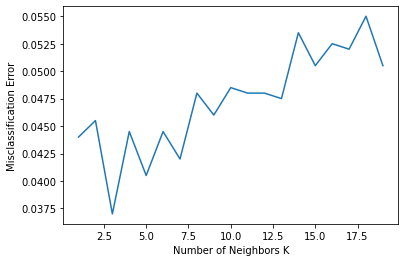

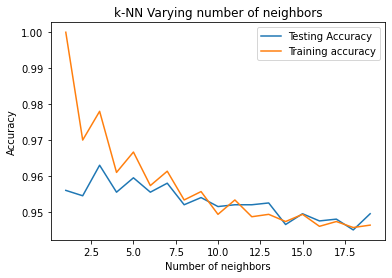

In [194]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# # ploting misclassification error vs k
# plt.plot(neighbors, MSE)
# plt.xlabel('Number of Neighbors K')
# plt.ylabel('Misclassification Error')
# plt.show()

__From above result;__
- we can see that the misclassification error is minimum at k =3.
- Hence, I am considering 3 is the optimal k. When k=3 the model accuracy is 0.963.
- From above graph of misclassification error vs k (with k value on X-axis), error is very low when K is 3.
- The testing accuracy is optimal with k=3.

========================================================================================================================
Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1, and Credit Card = 1, Education_1 = 0, Education_2 =
1, Education_3 = 0. Perform a k-NN classification with all predictors except ID and ZIP code using k = 1.
Remember to transform categorical predictors with more than two categories into dummy
variables first. Specify the success class as 1 (loan acceptance), and use the default cutoff value of
0.5. How would this customer be classified?

In [195]:
#Passing the varible values to the knn model for prediction through an array.
knn_2 = KNeighborsClassifier(n_neighbors=3)
knn_2.fit(X_train,Y_train.ravel())
predict = knn_2.predict(X_test)
print(predict)

[0 0 0 ... 0 1 0]


### Confusion Matrix

In [196]:
confusion_matrix(predict,Y_test.ravel())

array([[1800,   66],
       [   8,  126]], dtype=int64)

In [197]:
print(classification_report(predict, Y_test.ravel()))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1866
           1       0.66      0.94      0.77       134

    accuracy                           0.96      2000
   macro avg       0.83      0.95      0.88      2000
weighted avg       0.97      0.96      0.97      2000



In [198]:
x_new = np.array([40,10,84,2,2,0,0,0,1,1,0,1,0])

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train,Y_train.ravel())
prediction = knn_3.predict(x_new.reshape(1,13))
print(prediction)

[1]


- so for the first set of values where; Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1, and Credit Card = 1, Education_1 = 0, Education_2 = 1, Education_3 = 0. Should be a __potential target__ for the marketing team.

#### Repartition the data, this time into training, validation, and test sets (50% : 30% : 20%). Apply the k-NN method with the k chosen above. Compare the confusion matrix of the test set with that of the training and validation sets. Comment on the differences and their reason.

In [199]:
# Splitting data into test, train and validate using indexes 
val_id=[]
tr_id = np.random.choice(list(range(0, 5000)), replace = False, size = int(0.5 * len(dataset)))
print("trainging data size = ",len(tr_id))
rest_id=[]
for i in range(0,5000):
    if(i not in tr_id):
        rest_id.append(i)
print("Rest of the data size=",len(rest_id))
test_id=np.random.choice(rest_id, replace=False, size = int(0.6 * len(rest_id)))
print("test data size=", len(test_id))
for i in rest_id:
    if(i not in test_id):
        val_id.append(i)
print("Val data size=", len(val_id))

trainging data size =  2500
Rest of the data size= 2500
test data size= 1500
Val data size= 1000


In [200]:
train_data=dataset.loc[tr_id,:]
print(train_data.head())

test_data=dataset.loc[test_id,:]


val_data=dataset.loc[val_id,:]


      Age  Experience  Income  Family  CCAvg  Mortgage  Personal Loan  \
313    34           9      41       3    2.3         0              0   
59     31           5     188       2    4.5       455              0   
4174   40          14      59       3    0.5         0              0   
1063   56          30      39       3    1.4       131              0   
1605   54          28      83       3    0.8         0              0   

      Securities Account  CD Account  Online  CreditCard  Education_1  \
313                    0           0       0           1            1   
59                     0           0       0           0            1   
4174                   0           0       1           0            0   
1063                   0           0       0           1            1   
1605                   0           0       1           0            1   

      Education_2  Education_3  
313             0            0  
59              0            0  
4174            0      

In [201]:
train_y=train_data['Personal Loan']
test_y = test_data['Personal Loan']
val_y = val_data['Personal Loan']

In [202]:
# Droping the the Loan attribute, as its the target varibale
train_data = train_data.drop('Personal Loan', axis=1).values
print("Train data: ",train_data.shape)

test_data = test_data.drop('Personal Loan', axis=1).values
print("Test data: ",test_data.shape)

print("val data:", val_data.shape)
val_data = val_data.drop('Personal Loan', axis=1).values 



Train data:  (2500, 13)
Test data:  (1500, 13)
val data: (1000, 14)


In [203]:
# Normalizing data
scaler = StandardScaler()
scaler.fit(train_data)
scaler.fit(test_data)
scaler.fit(val_data)
X_train = scaler.transform(train_data)
X_test = scaler.transform(test_data)
X_val = scaler.transform(val_data)

In [204]:
# Creating the knn model and testing the test_data over knn
knn_4 = KNeighborsClassifier(n_neighbors=3)
knn_4.fit(X_train,train_y.values.ravel())
prediction4 = knn_4.predict(X_test)
print(prediction4)

[0 0 0 ... 0 0 0]


In [205]:
# Evaluating performance from the knn result
confusion_matrix(prediction4,test_y.ravel())

array([[1355,   47],
       [   6,   92]], dtype=int64)

In [206]:
# Classification report
print(classification_report(prediction4, test_y.ravel()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1402
           1       0.66      0.94      0.78        98

    accuracy                           0.96      1500
   macro avg       0.83      0.95      0.88      1500
weighted avg       0.97      0.96      0.97      1500

